### Downloading the Dataset


In [0]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

In [0]:
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

In [0]:
!ls

In [0]:
import os,shutil
folders = os.listdir('Images')

In [0]:
if not os.path.isdir('val_images'):
  os.mkdir('val_images')

In [0]:
classes = ['dogs','cats','horses','humans']

### Splitting into Train & Validation Set

In [0]:
for c in classes:
  p = os.path.join('val_images',c)
  if not os.path.isdir(p):
    os.mkdir(p)

split = 0.9
for f in os.listdir("Images"):
  path = 'Images/'+f
  imgs = os.listdir(path)
  split_size = int(split*len(imgs))
  files_to_move = imgs[split_size:]
  for img_f in files_to_move:
    src = os.path.join(path,img_f)
    dest = os.path.join('val_images/'+f,img_f)
    shutil.move(src,dest)

In [9]:
print('Training Data :')
for f in folders:
  path = 'Images/'+f
  print(f+" "+str(len(os.listdir(path))))

print('\nValidation Data :')
for f in folders:
  path = 'val_images/'+f
  print(f+" "+str(len(os.listdir(path))))

Training Data :
horses 181
cats 181
humans 181
dogs 181

Validation Data :
horses 21
cats 21
humans 21
dogs 21


In [10]:
from keras.preprocessing import image
from matplotlib import pyplot as plt
plt.style.use('seaborn')

Using TensorFlow backend.


In [11]:
img = image.load_img("Images/cats/cat.110.jpg")
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


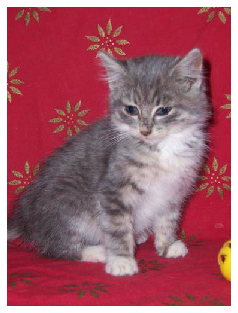

In [12]:
x = image.img_to_array(img)/255.0
plt.imshow(x)
plt.axis('off')
plt.show()

###  Model

In [0]:
from keras.layers import *
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
adam = optimizers.adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

In [19]:
train_gen = ImageDataGenerator(rescale=1.0/255)
val_gen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_gen.flow_from_directory("Images/",target_size=(150,150),batch_size=32,class_mode='categorical')
val_generator = val_gen.flow_from_directory("val_images/",target_size=(150,150),batch_size=32,class_mode='categorical')

Found 724 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [20]:
for x,y in train_generator:
   print(x.shape,y.shape)
   break

(32, 150, 150, 3) (32, 4)


### Training The Model

In [0]:
history = model.fit_generator(train_generator,epochs=80,steps_per_epoch=7,validation_data=val_generator,validation_steps=4)

In [0]:
hist = model.history

In [0]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

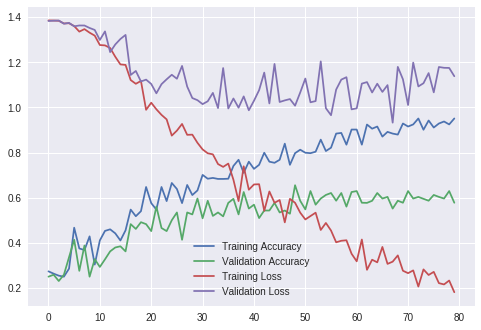

In [24]:
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.legend()
plt.show()